# MNIST

In [3]:
import csv
import numpy as np

def load_data(filepath, delimiter=",", dtype=float):
    """Load a numerical numpy array from a file."""

    print(f"Loading {filepath}...")
    with open(filepath, "r") as f:
        data_iterator = csv.reader(f, delimiter=delimiter)
        data_list = list(data_iterator)
    data = np.asarray(data_list, dtype=dtype)
    y = data[:, 0].reshape(-1, 1)
    x = data[:, 1:]
    print("Done.")
    return x, y

## 1. Dataset load

### 1-1. Using CSV dataset

In [95]:
TRAIN_FILE = "./datasets/MNIST/data_train.csv"
TEST_FILE =  "./datasets/MNIST/data_test.csv"

# train_data = load_data(TRAIN_FILE, ',', int)
# test_data = load_data(TEST_FILE, ',', int)

x_train, y_train = load_data(TRAIN_FILE, ',', int)
x_test, y_test = load_data(TEST_FILE, ',', int)

Loading ./datasets/MNIST/data_train.csv...
Done.
Loading ./datasets/MNIST/data_test.csv...
Done.


In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x train shape:", x_train.shape, x_train.dtype)
print("y train shape:", y_train.shape, y_train.dtype)
print("x test shape:", x_test.shape, x_test.dtype)
print("y test shape:", y_test.shape, y_test.dtype)

x train shape: (60000, 784) float64
y train shape: (60000, 1) uint8
x test shape: (10000, 784) float64
y test shape: (10000, 1) uint8


In [5]:
train_data = np.hstack((y_train, x_train))
print(train_data.shape)
test_data = np.hstack((y_test, x_test))
print(test_data.shape)

(60000, 785)
(10000, 785)


### 1-2. Using keras

In [4]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

print("x train shape:", x_train.shape, x_train.dtype)
print("y train shape:", y_train.shape, y_train.dtype)
print("x test shape:", x_test.shape, x_test.dtype)
print("y test shape:", y_test.shape, y_test.dtype)

2024-05-28 21:59:26.987048: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


x train shape: (60000, 784) float64
y train shape: (60000, 1) uint8
x test shape: (10000, 784) float64
y test shape: (10000, 1) uint8


In [4]:
train_data1 = np.hstack((y_train, x_train))
print(train_data1.shape)
test_data1 = np.hstack((y_test, x_test))
print(test_data1.shape)

(60000, 785)
(10000, 785)


In [5]:
t = train_data1 == train_data
print(t.all())

t = test_data1 == test_data
print(t.all())

True
True


In [6]:
data = train_data

for row in range(28):
    if not sum(data[0, 28 * row: 28 * (row + 1)]):
        continue
    for col in range(28):
        idx = row * 28 + col
        print("#" if data[0, 1+idx] else " ", end="")
    print()

                            
            ############    
        ################    
       ################     
       ###########          
        ####### ##          
         #####              
           ####             
           ####             
            ######          
             ######         
              ######        
               #####        
                 ####       
              #######       
            ########        
          #########         
        ##########          
      ##########            
    ##########              
    ########                


Import source files

In [7]:
from nn.nn1 import NeuralNet, Layer
from srcs.activations import LeakyRelu, Sigmoid, Softmax
from srcs.losses import MSELoss, CrossEntropyLoss, BCELoss
import matplotlib.pyplot as plt

In [2]:
import nn.nn_generic as nn

In [10]:
def to_col(x):
    return x.reshape((x.size, 1))

def test(net, test_data):
    correct = 0
    for i, test_row in enumerate(test_data):

        y = test_row[0]
        x = to_col(test_row[1:])
        out = net.forward(x)
        y_pred = np.argmax(out)
        # if not i % 3000:
        #     print('pred:', y_pred, 'true:', y)
        if y == y_pred:
            correct += 1

    return correct/test_data.shape[0]

## 2. Train the network

In [11]:
input_shape = x_train.shape[1]
output_shape = len(np.unique(y_train))

print("input shape:", input_shape)
print("output shape:", output_shape)

input shape: 784
output shape: 10


### 2-1. LeakyRelu

In [12]:
def train(net, train_data, epochs=10):
    x_train = train_data[:30000, 1:].T
    y_train = train_data[:30000, 0:1].T

    # print(train_data.shape)
    print("x_train.shape", x_train.shape)
    print("y_train.shape", y_train.shape)
    loss = net._loss_function
    train_loss = []

    for epoch in range(epochs):
        net.fit(x_train, y_train)
        # if epoch % 10 == 0:
        print(epoch)
        train_loss.append(loss.loss(net.forward(x_train), y_train))
        # y_pred = net.forward(x_train)#.reshape(1, -1)
        # print(y_pred, y_pred.shape)
        # print(y_pred.shape, y_train.flatten().shape)
        # print(y_train, y_train.shape)
        # train_loss.append(loss.loss(y_pred, y_train))

    '''
    for i, train_row in enumerate(train_data):
        # if not i%1000:
        #     print(i)
        x = to_col(train_row[1:])
        y = np.array(train_row[0], ndmin=2)
        # if not i%10000:
        #     print('y:', y)
        # print(y, y.shape)
        net.train(x, y)
        if i % 10 == 0:
            train_loss.append(loss(net.forward(x), y))
    '''

    plt.plot(train_loss)
    plt.show()

    return train_loss

#### 2-1-1. LeakyRelu + MSELoss

In [ ]:
layers = [
    Layer(input_shape, 16, LeakyRelu()),
    Layer(16, 16, LeakyRelu()),
    Layer(16, output_shape, LeakyRelu()),
]
net = NeuralNet(layers, MSELoss(), 0.01)

train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

#### 2-1-2. LeakyRelu + BCELoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9


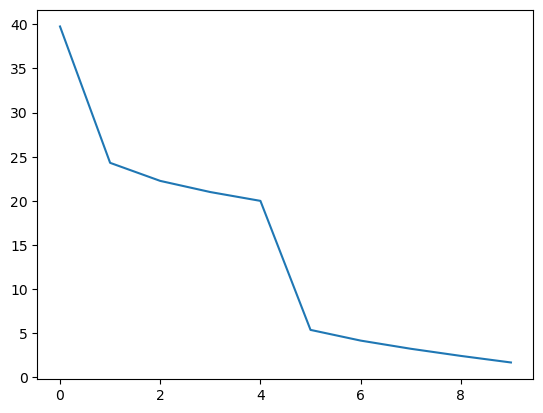

Accuracy is 10.28%


In [31]:
# Use BCELoss
layers = [
    Layer(input_shape, 16, LeakyRelu()),
    Layer(16, 16, LeakyRelu()),
    Layer(16, output_shape, LeakyRelu()),
]
net = NeuralNet(layers, BCELoss(), 0.01)

train_loss = train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

In [33]:
y_pred = 0.2
y = 0
eps=1e-15

y_pred = np.clip(y_pred, eps, 1 - eps)
loss = - np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
loss
train_loss

[39.751436134086454,
 24.303120383714138,
 22.25802131250946,
 20.993333721436105,
 19.993613572264117,
 5.377074303060345,
 4.164613850560203,
 3.2395748845850108,
 2.429895463456245,
 1.6853877870752105]

In [47]:

class CrossEntropyLoss():
    def loss(self, y_pred, y):
        # predicted should be a probability distribution (output of softmax)
        return -np.mean(y * np.log(y_pred))

    def dloss(self, y_pred, y):
        # Gradient of the loss with respect to the predicted values
        return y_pred - y 

#### 2-1-3. LeakyRelu + CrossEntropyLoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0


/tmp/ipykernel_131101/3296391042.py:4: RuntimeWarning: invalid value encountered in log
  return -np.mean(y * np.log(y_pred))


1
2
3
4
5
6
7
8
9


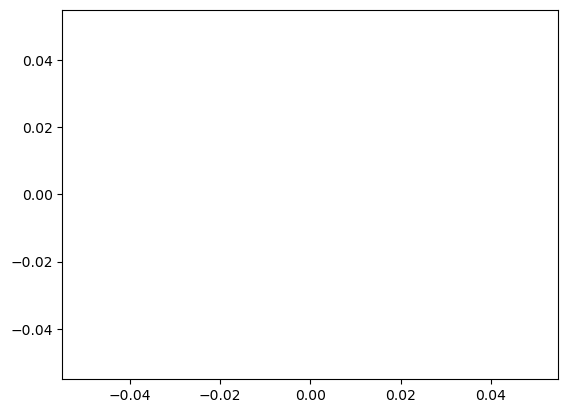

Accuracy is 8.92%


In [48]:
layers = [
    Layer(input_shape, 16, LeakyRelu()),
    Layer(16, 16, LeakyRelu()),
    Layer(16, output_shape, LeakyRelu()),
]
net = NeuralNet(layers, CrossEntropyLoss(), 0.001)

train_loss = train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

In [49]:
train_loss

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

### 2-2. Sigmoid

In [55]:
def train(net, train_data):
    # Precompute all target vectors.
    ys = {}
    for y in range(10):
        yv = np.zeros((10, 1))
        yv[t] = 1
        ys[t] = yv

    for i, train_row in enumerate(train_data):
        if not i%10000:
            print(i)

        y = ys[train_row[0]] # one-hot vector
        x = to_col(train_row[1:])
        net.train(x, y)

#### 2-2-1. Sigmoid + MSELoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9


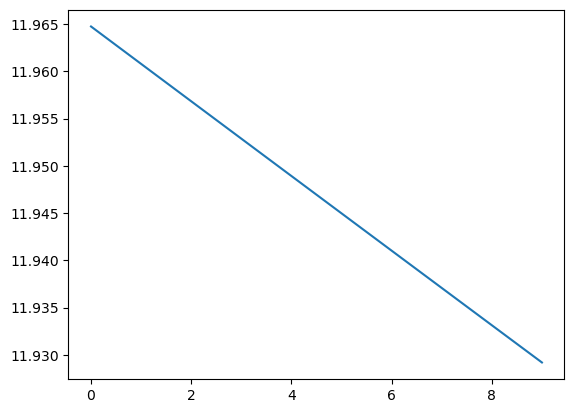

Accuracy is 10.28%


In [40]:
# Use a Sigmoid as the final layer
layers = [
    Layer(input_shape, 16, LeakyRelu()),
    Layer(16, 16, LeakyRelu()),
    Layer(16, output_shape, Sigmoid()),
]
net = NeuralNet(layers, MSELoss(), 0.001)

train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

#### 2-2-2. Sigmoid + BCELoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9


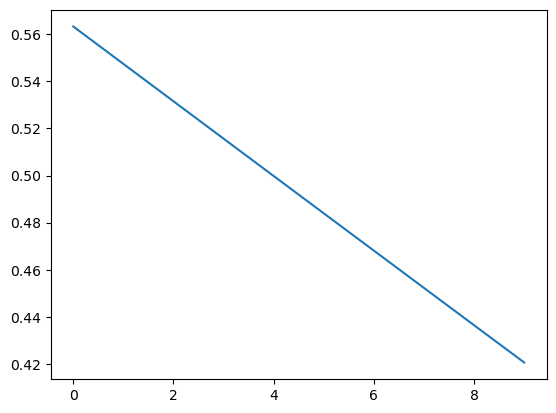

Accuracy is 10.32%


In [41]:
# sigmoid at the end and the BCELoss
layers = [
    Layer(input_shape, 16, LeakyRelu()),
    Layer(16, 16, LeakyRelu()),
    Layer(16, output_shape, Sigmoid()),
]
net = NeuralNet(layers, BCELoss(), 0.001)

train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

#### 2-2-3. Sigmoid + CrossEntropyLoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9


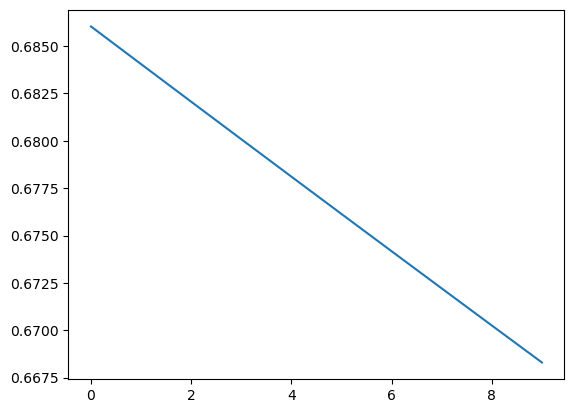

Accuracy is 8.92%


In [42]:
# sigmoid at the end and the CrossEntropyLoss
layers = [
    Layer(input_shape, 16, LeakyRelu()),
    Layer(16, 16, LeakyRelu()),
    Layer(16, output_shape, Sigmoid()),
]
net = NeuralNet(layers, CrossEntropyLoss(), 0.001)

train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

### 2-3. Softmax

In [58]:
def train(net, train_data):
    for i, train_row in enumerate(train_data):
        t = train_row[0]  # Assume the first element is the class label
        x = to_col(train_row[1:])  # Assume the rest are input features
        
        # Convert the class label to one-hot encoding
        t_one_hot = np.zeros((10, 1))  # net.output_size is the number of classes
        t_one_hot[t] = 1

        # Train the network
        # print("x in train:", x.shape)
        net.train(x, t_one_hot)

#### 2-3-1. Softmax + MSELoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9


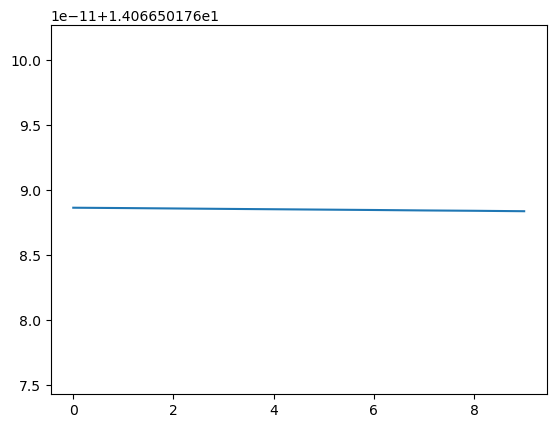

Accuracy is 9.80%


In [43]:
layers = [
    Layer(input_shape, 16, LeakyRelu()),
    Layer(16, 16, LeakyRelu()),
    Layer(16, output_shape, Softmax()),
]
net = NeuralNet(layers, MSELoss(), 0.001)

train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

#### 2-3-2. Softmax + BCELoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9


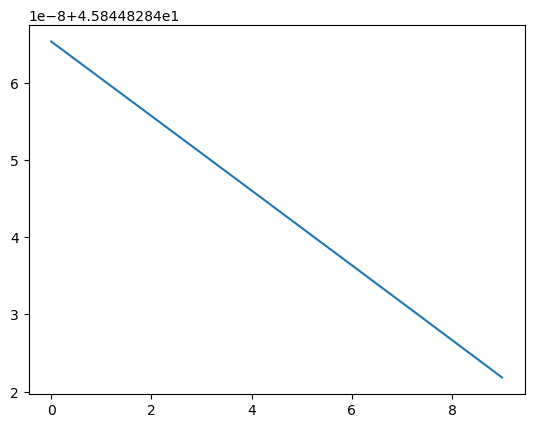

Accuracy is 9.80%


In [44]:
layers = [
    Layer(input_shape, 16, LeakyRelu()),
    Layer(16, 16, LeakyRelu()),
    Layer(16, output_shape, Softmax()),
]
net = NeuralNet(layers, BCELoss(), 0.001)

train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

#### 2-3-3. Softmax + CrossEntropyLoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


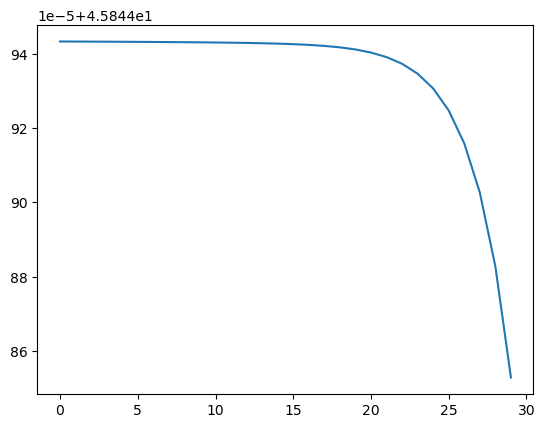

Accuracy is 9.80%


In [59]:
layers = [
    Layer(input_shape, 16, LeakyRelu()),
    Layer(16, 16, LeakyRelu()),
    Layer(16, output_shape, Softmax()),
]
net = NeuralNet(layers, CrossEntropyLoss(), 0.01)

train_loss = train(net, train_data, 30)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

In [ ]:
train_loss

100%|██████████| 10/10 [00:02<00:00,  4.64it/s]


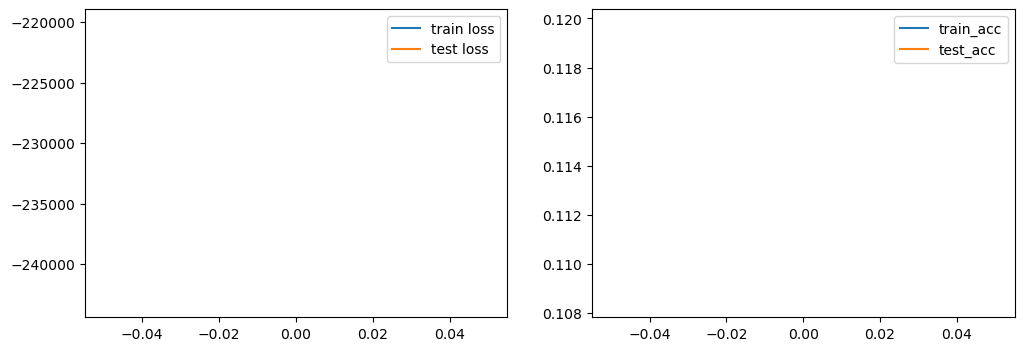

In [16]:

x_train = train_data[:30000, 1:].T
y_train = train_data[:30000, 0:1].T
parameters, train_loss, train_acc = nn.nn(x_train, y_train, hidden_layers=(16, 16), lr=0.03, epochs=10, plot_graph=True)

In [17]:
for k, v in parameters.items():
    print(k, v.shape)

W1 (16, 784)
b1 (16, 1)
W2 (16, 16)
b2 (16, 1)
W3 (1, 16)
b3 (1, 1)
